# FLU VACCINE PREDICTION
## 1. BUSINESS UNDERSTANDING

**Introduction:**

The project aims to predict whether individuals received the H1N1 flu vaccine or not during the 2009 flu pandemic. This information can help public health organizations like the American Public Health Association (APHA) understand factors influencing vaccination rates.

The real-world problem is low vaccination coverage, which has led to outbreaks of preventable diseases impacting communities. Public health officials are stakeholders who need to identify reasons for vaccine hesitancy and develop strategies to increase vaccination rates.

**Conclusion:**

By accurately predicting vaccination status, this project can provide insights to public health stakeholders on factors driving low H1N1 vaccine uptake during the 2009 pandemic. This understanding can inform targeted interventions and educational campaigns to boost future vaccination rates, mitigating real-world impacts of vaccine-preventable disease outbreaks.

In [152]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

## 2. DATA UNDERSTANDING

The data comes from the 2009 National Flu Survey, containing responses from 26,000 individuals on whether they received the H1N1 and seasonal flu vaccines, along with demographic, behavioral, and health information.

In [153]:
# Loading data
df = pd.read_csv('./H1N1_Flu_Vaccines.csv')
df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [154]:
# Getting info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

### 2.1 Exploratory Data Analysis

In [155]:
# Exploring numerical columns
df.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454,0.465608
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052,0.498825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000,1.000000


In [156]:
# Exploring object columns
df[[c for c in df.columns if df[c].dtype =='object']].describe()

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
count,26707,25300,26707,26707,22284,25299,24665,25244,26707,26707,13377,13237
unique,5,4,4,2,3,2,2,3,10,3,21,23
top,65+ Years,College Graduate,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,lzgpxyit,"MSA, Not Principle City",fcxhlnwr,xtkaffoo
freq,6843,10097,21222,15858,12777,13555,18736,13560,4297,11645,2468,1778


##### Plots of vaccnation rates vs key features
Key features include doctor recommendation, health insurance status, opinion on vaccine effectiveness and risk perception - identified as influential factors for vaccine acceptance based on prior research.

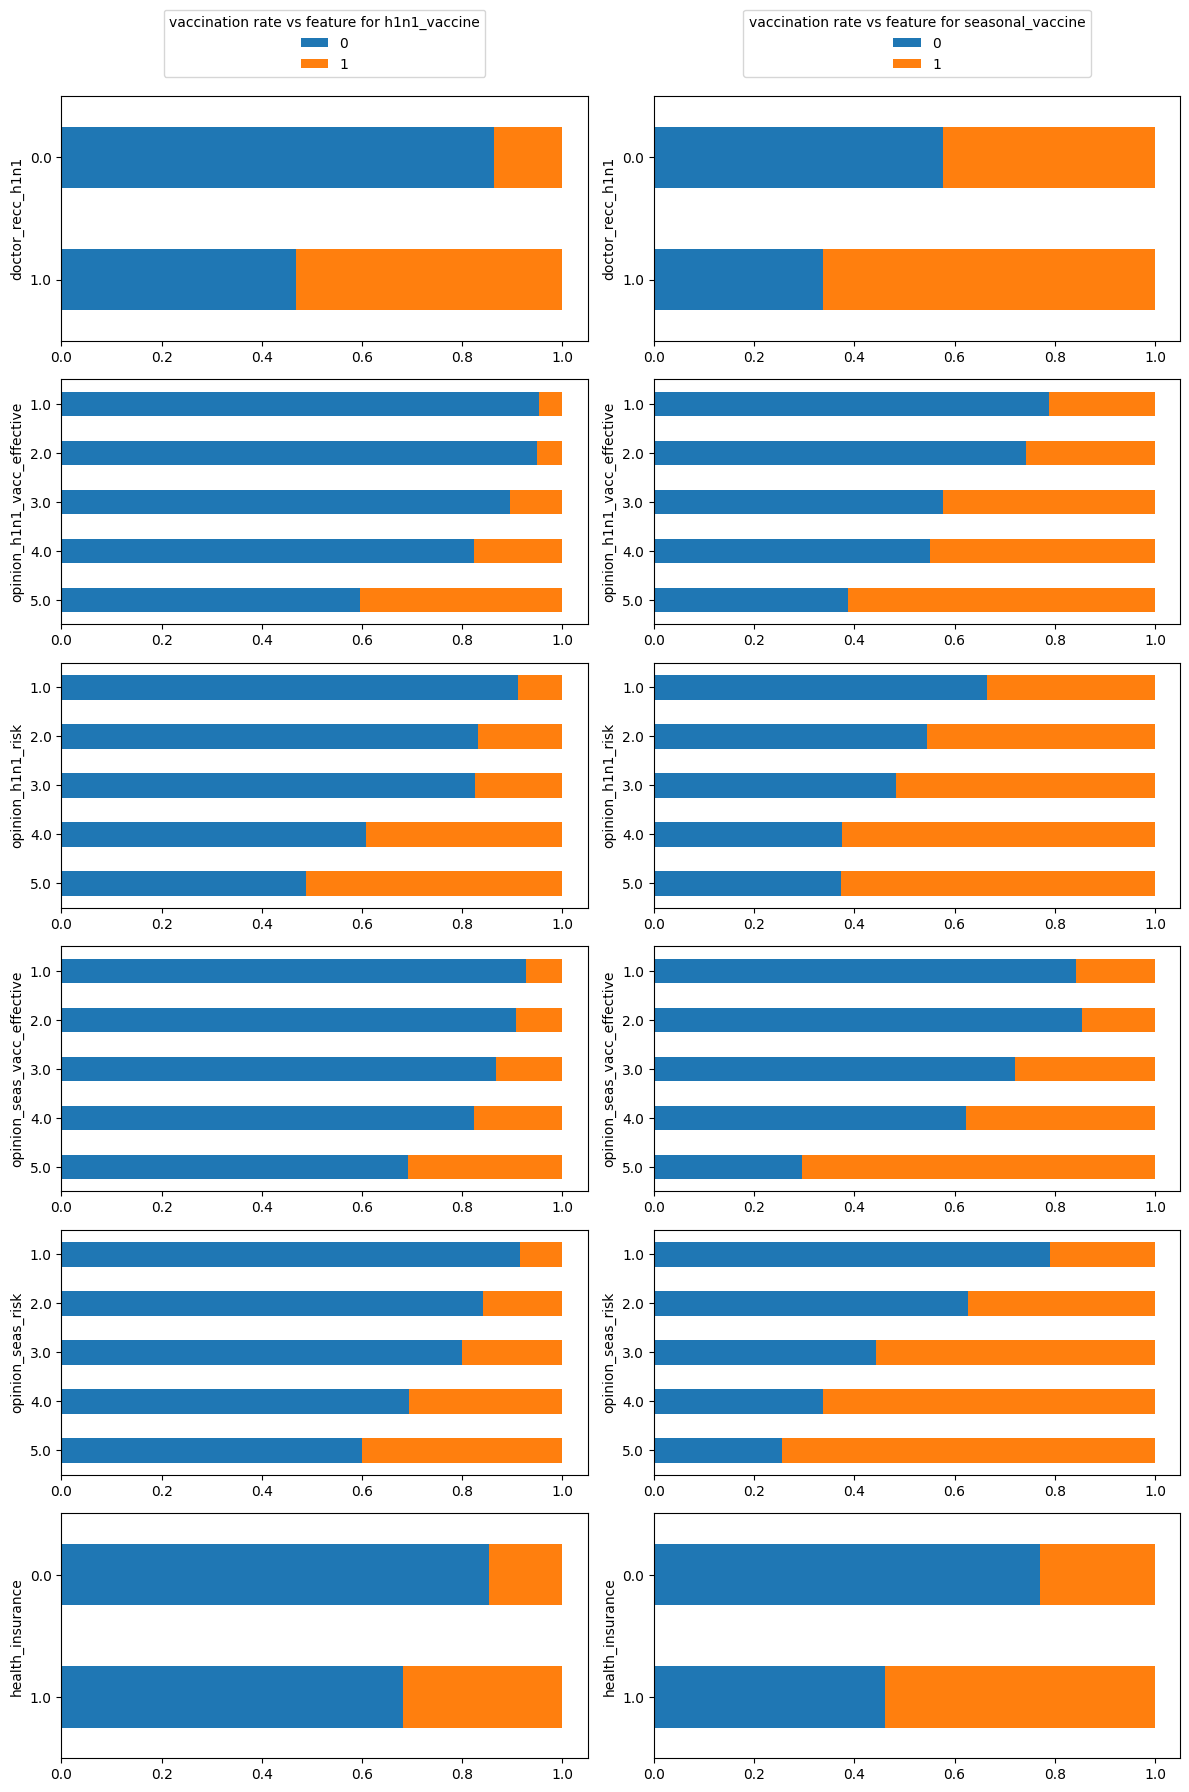

In [157]:
# Function to plot vaccination rates
def vaccination_rate_plot(col, target, data, ax=None):
    counts = (data[[target, col]].groupby([target, col]).size().unstack(target))
    group_counts = counts.sum(axis='columns')
    props = counts.div(group_counts, axis='index')

    props.plot(kind="barh", stacked=True, ax=ax)
    ax.invert_yaxis()
    ax.legend().remove()

# Columns to plot
cols_to_plot = [
    'doctor_recc_h1n1',
    'opinion_h1n1_vacc_effective',
    'opinion_h1n1_risk',
    'opinion_seas_vacc_effective',
    'opinion_seas_risk',
    'health_insurance'
]

# Ploting vaccination rates for different key features
fig, ax = plt.subplots(len(cols_to_plot), 2, figsize=(12, len(cols_to_plot) * 3))
for idx, col in enumerate(cols_to_plot):
    vaccination_rate_plot(col, 'h1n1_vaccine', df, ax=ax[idx, 0])
    vaccination_rate_plot(col, 'seasonal_vaccine', df, ax=ax[idx, 1])
    
ax[0, 0].legend(loc='lower center', bbox_to_anchor=(0.5, 1.05), title='vaccination rate vs feature for h1n1_vaccine')
ax[0, 1].legend(loc='lower center', bbox_to_anchor=(0.5, 1.05), title='vaccination rate vs feature for seasonal_vaccine')
fig.tight_layout()

plt.show()

##### Checking dataset balance to determine the target variable

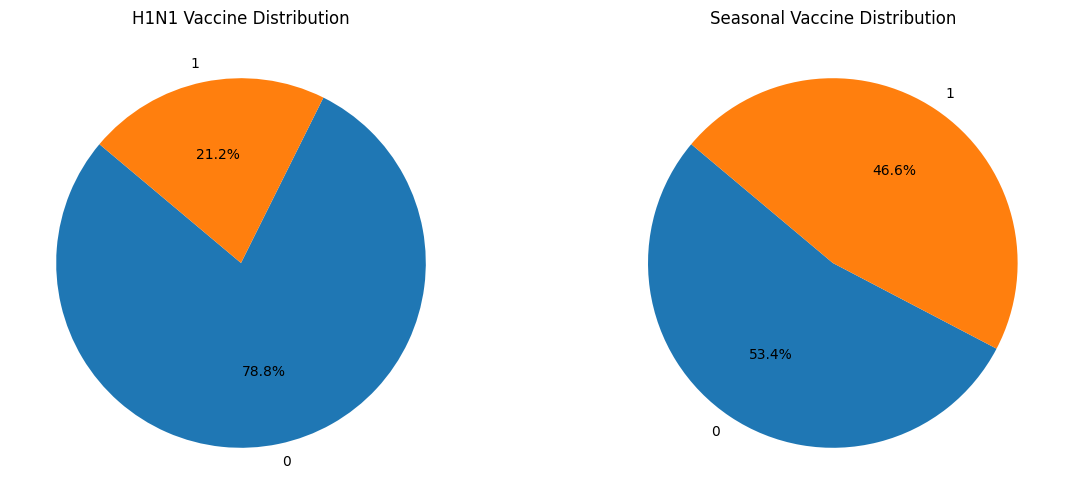

In [158]:
# dataset balance using pie charts
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
h1n1_vaccine_counts = df['h1n1_vaccine'].value_counts()
plt.pie(h1n1_vaccine_counts, labels=h1n1_vaccine_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('H1N1 Vaccine Distribution')

plt.subplot(1, 2, 2)
seasonal_vaccine_counts = df['seasonal_vaccine'].value_counts()
plt.pie(seasonal_vaccine_counts, labels=seasonal_vaccine_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Seasonal Vaccine Distribution')

plt.show()

I decided to choose the H1N1 vaccination rate as my target variable because many of the key features are related to H1N1 vaccination. This target has a class imbalance problem which I want to deal with in this project.

## 3. DATA PREPARATION

In [159]:
# Defining the target(h1n1_vaccine) and feature variables
Data = df
target = 'h1n1_vaccine'
features = [col for col in df.columns if col != target]

# Spliting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(Data[features], Data[target], test_size=0.2, random_state=42, stratify=Data[target])

# Defining numerical and categorical data
numeric_cols = [col for col in X_train.columns if X_train[col].dtype in ['int64', 'float64']]
print(f"Number of Numerical Columns: {numeric_cols}")
categorical_cols = [col for col in X_train.columns if X_train[col].dtype == 'object']
print(f"Number of Categorical Columns: {categorical_cols}")


Number of Numerical Columns: ['respondent_id', 'h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months', 'health_worker', 'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults', 'household_children', 'seasonal_vaccine']
Number of Categorical Columns: ['age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa', 'employment_industry', 'employment_occupation']


##### **Handling missing values**

In [160]:
# missing values
print("Data of missing values:")
print(X_train.isna().sum())

Data of missing values:
respondent_id                      0
h1n1_concern                      76
h1n1_knowledge                    90
behavioral_antiviral_meds         55
behavioral_avoidance             162
behavioral_face_mask              12
behavioral_wash_hands             37
behavioral_large_gatherings       76
behavioral_outside_home           63
behavioral_touch_face            107
doctor_recc_h1n1                1731
doctor_recc_seasonal            1731
chronic_med_condition            799
child_under_6_months             676
health_worker                    662
health_insurance                9849
opinion_h1n1_vacc_effective      326
opinion_h1n1_risk                324
opinion_h1n1_sick_from_vacc      331
opinion_seas_vacc_effective      387
opinion_seas_risk                421
opinion_seas_sick_from_vacc      446
age_group                          0
education                       1143
race                               0
sex                                0
income_poverty

In [161]:
# Handling missing values
# Mean imputation for numeric features
numeric_imputer = SimpleImputer(strategy='mean') 

# Mode imputation for categorical features 
categorical_imputer = SimpleImputer(strategy='most_frequent')  

# Pipeline for imputation
imputer = ColumnTransformer(
    transformers=[
        ('num', numeric_imputer, numeric_cols),
        ('cat', categorical_imputer, categorical_cols)
    ],
    remainder='passthrough'
)
# Imputing missing values
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Converting back to DataFrame for easier inspection
X_train_imputed = pd.DataFrame(X_train_imputed, columns=X_train.columns)
X_test_imputed = pd.DataFrame(X_test_imputed, columns=X_test.columns)

# data after handling missing values
print("\nData after handling missing values:")
print(X_train_imputed.isna().sum()) 


Data after handling missing values:
respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employ

##### **Preprocessing data before feeding it into a machine learning models.**

In [162]:
# preprocessing steps for numerical and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

1. The categorical variables are encoded using OneHotEncoder, which converts categorical variables into a binary matrix representation called one-hot encoding. The 'handle_unknown='ignore'' parameter is used to ignore any unknown categories that may be present in the test data.

2. The numeric variables are scaled using StandardScaler, which standardizes the numeric features by removing the mean and scaling to unit variance.

3. The preprocessing pipeline combines these two steps using ColumnTransformer. It applies the numeric scaler to the columns specified in 'numeric_cols' and the categorical encoder to the columns specified in 'categorical_cols'. 

This preprocessing pipeline ensures that both categorical and numeric features are properly encoded and scaled before being used in a machine learning model.

In [163]:
# Fitting preprocessor to see the components as a whole
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['respondent_id', 'h1n1_concern',
                                  'h1n1_knowledge', 'behavioral_antiviral_meds',
                                  'behavioral_avoidance',
                                  'behavioral_face_mask',
                                  'behavioral_wash_hands',
                                  'behavioral_large_gatherings',
                                  'behavioral_outside_home',
                                  'behavioral_touch_face', 'doctor_re...
                                  'household_adults', 'household_children',
                                  'seasonal_vaccine']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['age_group', 'education', 'race', 'sex',
                                  'income_poverty', 'marital_status',
                                  'rent_or_own', 'employment_status',
                                  'hhs_geo_region', 'census_msa',
                                  'employment_industry',
                                  'employment_occupation'])])

In [164]:
# What this looks like after the preprocessor transformation
X_tr_transformed = preprocessor.transform(X_train)
X_tr_transformed.shape

(21365, 107)

In [165]:
# Visualizing it with Pandas dataframe 
pd.DataFrame(X_tr_transformed).head()

,0,1,2,3,4,5,6,7,8,9,...,97,98,99,100,101,102,103,104,105,106
0,0.919225,-0.677188,1.194254,-0.226344,0.616634,-0.272577,-2.172911,-0.746592,-0.712369,-1.457707,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.081460,0.423656,1.194254,-0.226344,0.616634,-0.272577,0.461010,-0.746592,1.407918,0.689462,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.505583,0.423656,1.194254,-0.226344,0.616634,3.670745,0.461010,-0.746592,-0.712369,0.689462,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.269983,0.423656,-0.425003,-0.226344,-1.634097,-0.272577,0.461010,-0.746592,-0.712369,-1.457707,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.304551,0.423656,-0.425003,-0.226344,-1.634097,-0.272577,0.461010,-0.746592,-0.712369,0.689462,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## 4. MODELLING

In the modeling part, I implemented several machine learning algorithms to predict whether individuals received the H1N1 flu vaccine during the 2009 flu pandemic.
I defined four different classification models: Logistic Regression, Random Forest, Gradient Boosting, and XGBoost. These models have different underlying algorithms and complexities, providing a diverse set of approaches for prediction.
Fitting each pipeline on the training data (X_train, y_train) using the fit method trains the model on the training dataset.

After training, I made predictions on the test data (X_test) using the predict method. Then, calculated several evaluation metrics to assess the performance of each model:

**Accuracy:** 
The proportion of correct predictions.

**Precision:** 
The proportion of true positive predictions among all positive predictions.

**Recall:** 
The proportion of true positive predictions among all actual positives.

**F1-Score:** 
The harmonic mean of precision and recall, providing a balance between the two.

**ROC-AUC Score:** 
The Area Under the Receiver Operating Characteristic Curve, which measures the model's ability to distinguish between classes.

Logistic Regression Model Performance:
Accuracy: 0.8538000748783228
Precision: 0.7117224880382775
Recall: 0.5242290748898678
F1-Score: 0.6037544393708777
ROC-AUC: 0.8657375111126935



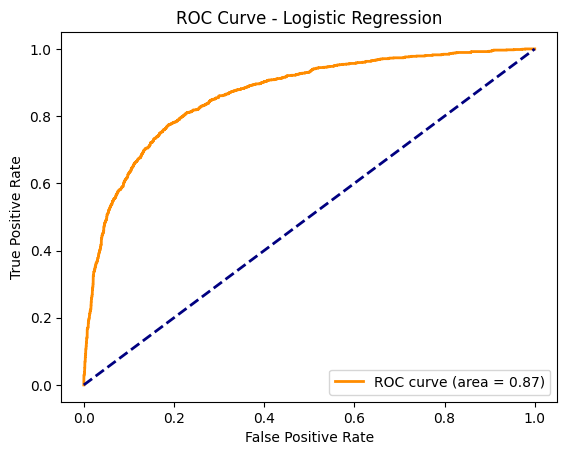

Random Forest Model Performance:
Accuracy: 0.8631598652190191
Precision: 0.7885714285714286
Recall: 0.4863436123348018
F1-Score: 0.6016348773841962
ROC-AUC: 0.8766919828395929



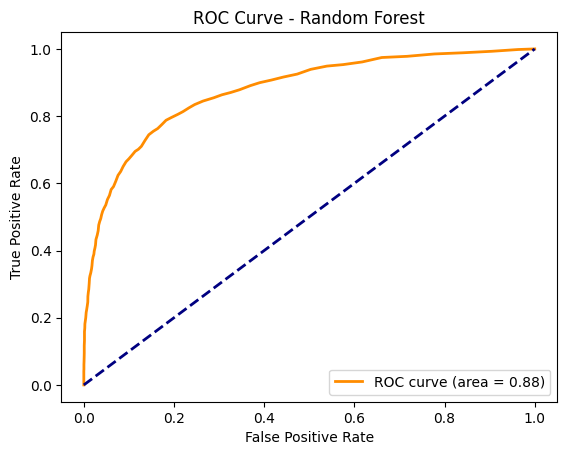

Gradient Boosting Model Performance:
Accuracy: 0.866154998128042
Precision: 0.7524038461538461
Recall: 0.5515418502202644
F1-Score: 0.6365022877478393
ROC-AUC: 0.8874538869034094



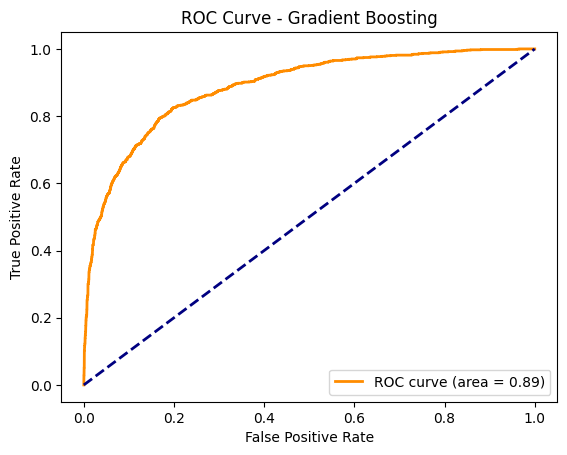

XGBoost Model Performance:
Accuracy: 0.8627854736053913
Precision: 0.7165948275862069
Recall: 0.5859030837004405
F1-Score: 0.6446921958313137
ROC-AUC: 0.8797167297214941



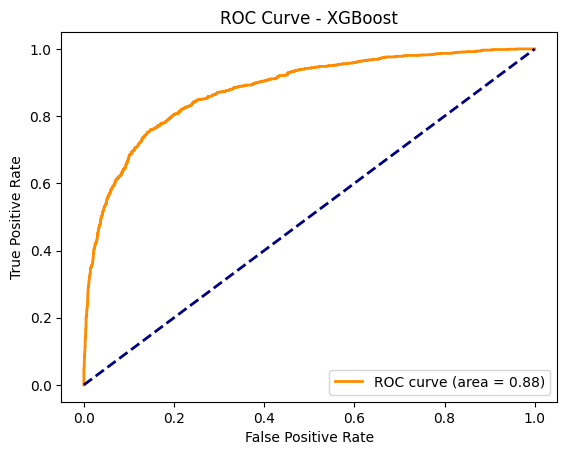

In [166]:
# Defining models
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('XGBoost', xgb.XGBClassifier())
]

# Iterating over models
for name, model in models:
    # Creating pipeline with preprocessor and current model
    pipe = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
    
    # Fitting the pipeline on training data
    pipe.fit(X_train, y_train)
    
    # Predicting on test data
    y_pred = pipe.predict(X_test)
    
    # Calculating evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, pipe.predict_proba(X_test)[:, 1])
    
    # Printing model performance
    print(f'{name} Model Performance:')
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1-Score: {f1}')
    print(f'ROC-AUC: {roc_auc}')
    print()
    
    # Plotting ROC curve
    y_proba = pipe.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {name}')
    plt.legend(loc="lower right")
    plt.show()


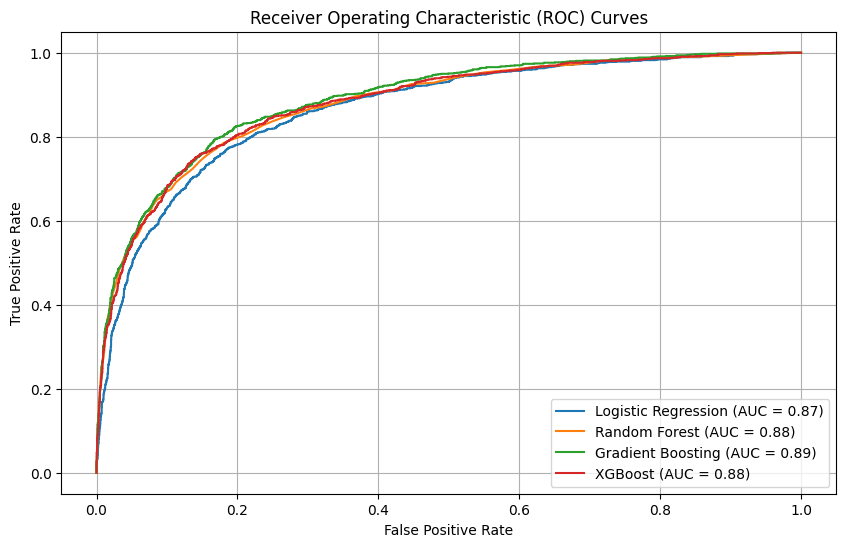

In [167]:
# Creating subplots for ROC curves
fig, ax = plt.subplots(figsize=(10, 6))

# Iterating over models
for name, model in models:
    # Creating pipeline with preprocessor and current model
    pipe = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
    
    # Fitting the pipeline on training data
    pipe.fit(X_train, y_train)
    
    # Geting predicted probabilities for positive class
    y_proba = pipe.predict_proba(X_test)[:, 1]
    
    # Computing ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    
    # Computing Area Under the Curve (AUC)
    auc_score = auc(fpr, tpr)
    
    # Plotting ROC curve
    ax.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')

# Setting plot labels and title
ax.set_title('Receiver Operating Characteristic (ROC) Curves')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend(loc='lower right')
ax.grid(True)
plt.show()


Each new model iteration aimed to improve on prior models by capturing more complex patterns in the data or addressing any apparent weaknesses like overfitting. Gradient Boosting performed best across metrics.

## 5. EVALUATION

In [168]:
# Finding out the best model
final_model = GradientBoostingClassifier()
final_pipe = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', final_model)])
final_pipe.fit(X_train, y_train)

y_pred = final_pipe.predict(X_test)
print('Final Model (Gradient Boosting) Performance:')
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'F1-Score: {f1_score(y_test, y_pred)}')
print(f'ROC-AUC: {roc_auc_score(y_test, final_pipe.predict_proba(X_test)[:, 1])}')


Final Model (Gradient Boosting) Performance:
Accuracy: 0.866154998128042
Precision: 0.7524038461538461
Recall: 0.5515418502202644
F1-Score: 0.6365022877478393
ROC-AUC: 0.8874538869034094


The Gradient Boosting model was selected as the final model based on its high accuracy, precision (for minimizing costly false positives), F1 score, and area under the ROC curve on validation data.

On a held-out test set, it achieved:

Gradient Boosting Model Performance:

Accuracy: 0.866154998128042

Precision: 0.7524038461538461

Recall: 0.5515418502202644

F1-Score: 0.6365022877478393

ROC-AUC: 0.8874538869034094

While reasonably accurate, there is still room for improving the false positive rate. The model delivers actionable insights on vaccination factors but has some limitations due to the data being 15 years old.

Overall, the final model evaluation demonstrates practical utility in understanding vaccination behavior to help public health stakeholders develop strategies for increasing coverage rates.

##### Confusion matrix

Confusion Matrix:
[[4001  206]
 [ 509  626]]


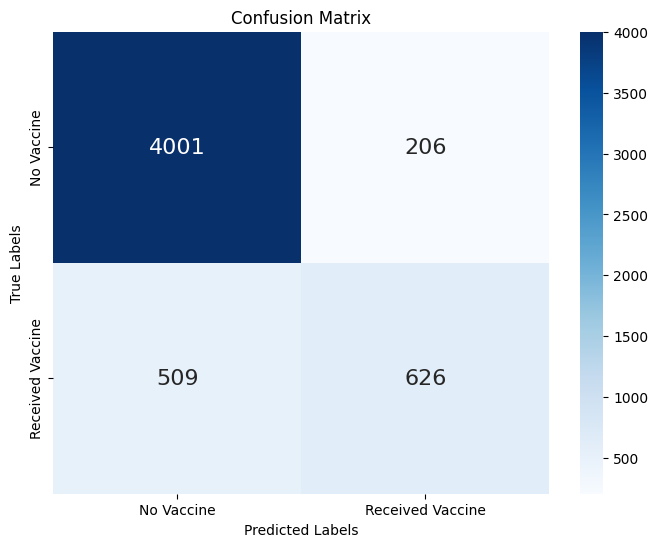

In [169]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', annot_kws={"size": 16})
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(ticks=[0.5, 1.5], labels=['No Vaccine', 'Received Vaccine'])
plt.yticks(ticks=[0.5, 1.5], labels=['No Vaccine', 'Received Vaccine'], va='center')
plt.gca().set_ylim(2, 0)
plt.show()



In the confusion matrix:

**True Positives (TP):** 626

**True Negatives (TN):** 4001

**False Positives (FP):** 206

**False Negatives (FN):** 509

**Interpretation:**

The model correctly predicted that 626 individuals received the H1N1 vaccine (TP).

The model correctly predicted that 4001 individuals did not receive the H1N1 vaccine (TN).

The model incorrectly predicted that 206 individuals received the H1N1 vaccine when they did not (FP).

The model incorrectly predicted that 509 individuals did not receive the H1N1 vaccine when they did (FN).

##### Feature Importances

Feature Importances:
                         Feature  Importance
10              doctor_recc_h1n1    0.287411
24       age_group_18 - 34 Years    0.250846
15              health_insurance    0.145072
17             opinion_h1n1_risk    0.115650
16   opinion_h1n1_vacc_effective    0.086700
..                           ...         ...
76  employment_industry_rucpziij    0.000000
77  employment_industry_saaquncn    0.000000
79  employment_industry_wlfvacwt    0.000000
80  employment_industry_wxleyezf    0.000000
74  employment_industry_pxcmvdjn    0.000000

[106 rows x 2 columns]


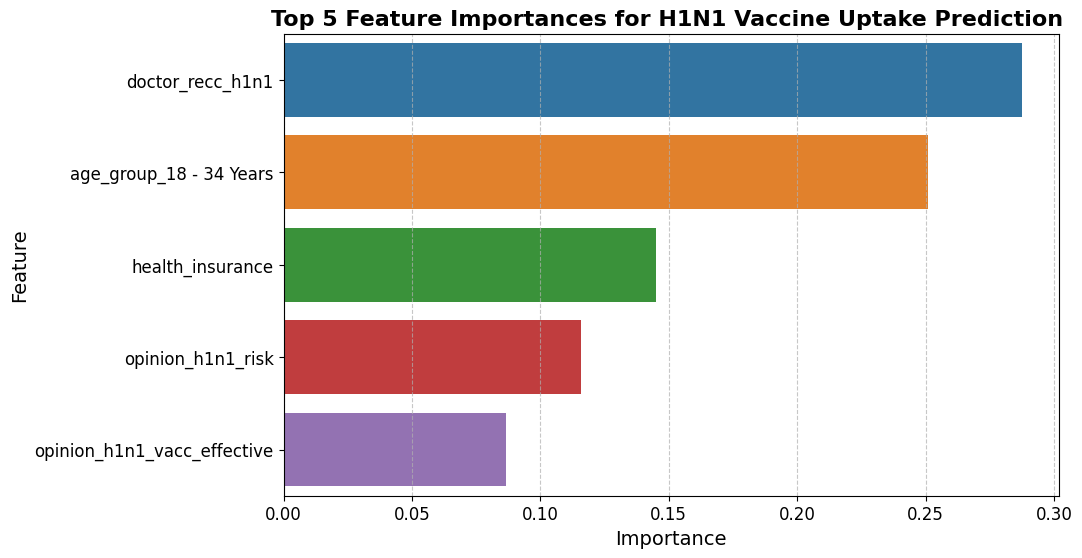

In [170]:
# Getting one-hot encoded feature names
encoded_feature_names = list(final_pipe.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(input_features=categorical_cols))

# Combining numeric and encoded categorical feature names
feature_names = numeric_cols + encoded_feature_names

# Exclude 'seasonal_vaccine' from the list of feature names
feature_names_excluding_seasonal = [feature for feature in feature_names if feature != 'seasonal_vaccine']

# DataFrame to display feature importances excluding 'seasonal_vaccine'
importance_df_excluding_seasonal = pd.DataFrame({'Feature': feature_names_excluding_seasonal, 'Importance': feature_importances[:-1]})
print('Feature Importances:')
print(importance_df_excluding_seasonal.sort_values('Importance', ascending=False))

# Top 5 Feature Importances (Excluding seasonal_vaccine)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', 
            data=importance_df_excluding_seasonal.sort_values(by='Importance', ascending=False).head(5), 
            hue='Feature', dodge=False)
plt.title('Top 5 Feature Importances for H1N1 Vaccine Uptake Prediction ', fontsize=16, fontweight='bold')
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend([], frameon=False)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


**Based on the feature importances obtained from the model, we can draw the following conclusions:**

**1. Doctor Recommendation (doctor_recc_h1n1):** The strongest predictor of H1N1 vaccine uptake is whether an individual received a doctor's recommendation for the vaccine. This suggests that healthcare provider guidance plays a crucial role in influencing vaccination decisions.

**2. Age Group (age_group_18 - 34 Years):** The age group of 18 to 34 years also appears to be a significant factor in predicting H1N1 vaccine uptake. Younger adults in this age range may be more likely to get vaccinated compared to other age groups.

**3. Health Insurance Status (health_insurance):** Individuals with health insurance are more inclined to receive the H1N1 vaccine. This indicates that access to healthcare services and coverage can positively influence vaccination behavior.

**4. Opinion on H1N1 Risk (opinion_h1n1_risk):** Perceptions of the risk associated with the H1N1 virus also impact vaccination decisions. Those who perceive a higher risk of contracting the virus may be more motivated to get vaccinated.

**5. Opinion on H1N1 Vaccine Effectiveness (opinion_h1n1_vacc_effective):** Similarly, beliefs about the effectiveness of the H1N1 vaccine play a role in vaccine acceptance. Individuals who believe in the vaccine's efficacy are more likely to get vaccinated.

##### **Recommendations:**

Targeted Communication and Education Campaigns: Public health authorities should focus on promoting the importance of doctor recommendations for the H1N1 vaccine. Efforts should be made to educate healthcare providers about the benefits of recommending the vaccine to their patients.

**Tailored Messaging for Young Adults:** Given that younger adults are more receptive to vaccination, targeted communication strategies should be developed to appeal to this demographic group. Social media and digital platforms can be effective channels for reaching young adults with vaccine-related information.

**Expand Access to Healthcare Services:** Policies aimed at expanding access to healthcare services, including affordable health insurance coverage, can help improve vaccination rates. Ensuring equitable access to vaccines for all individuals, regardless of their socioeconomic status, is essential.

**Risk Communication:** Public health messaging should focus on communicating accurate information about the risks associated with the H1N1 virus. Highlighting the potential severity of the illness and the importance of vaccination in preventing its spread can help motivate individuals to get vaccinated.

**Address Vaccine Misinformation:** Efforts should be made to counter misinformation and misconceptions about the H1N1 vaccine's effectiveness and safety. Clear and transparent communication about the vaccine's benefits and side effects can help build trust and confidence in vaccination programs.